<a href="https://colab.research.google.com/github/sime1/notebooks/blob/master/degree_and_alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting nella regressione polinomiale

In questo notebook ho messo in evidenza come il problema dell'**ovefitting**  si verifichi in modo più evidente al crescere del grado del polinomio utilizzato per la regressione polinomiale

In [0]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ho creato dei dati con una singola feature in modo che si possano visualizzare facilmente, quindi ho creato dei grafici per mostrare come cambi la previsione del modello al cambiare del grado del polinomio, per due valori di alfa (0.0 e 1.0)

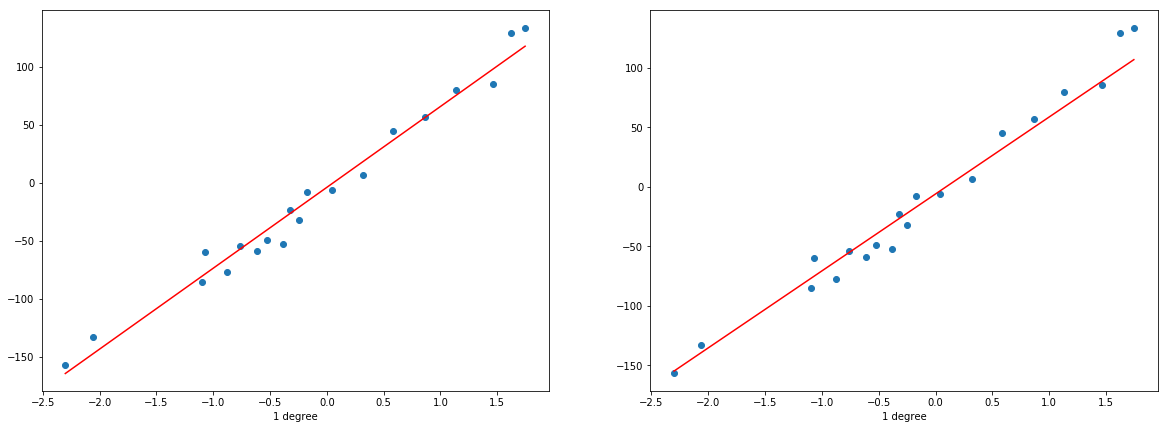

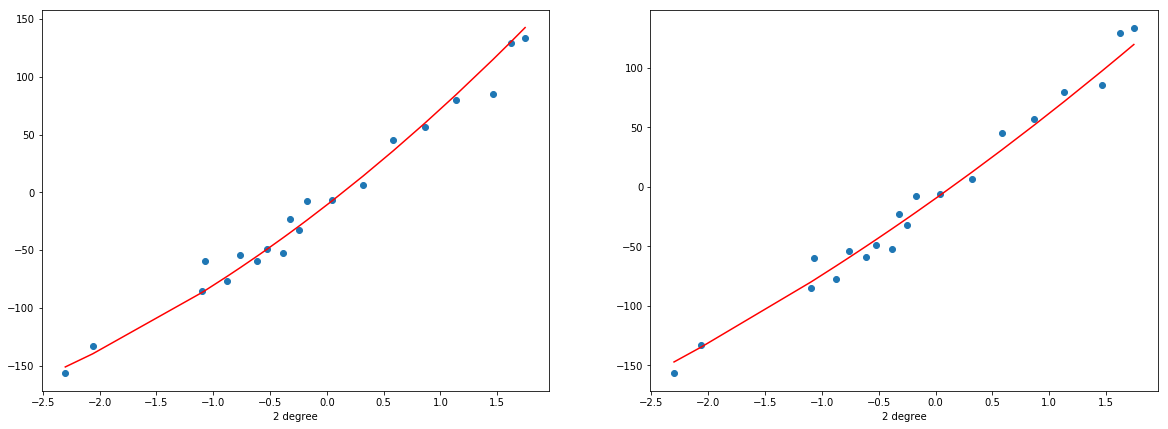

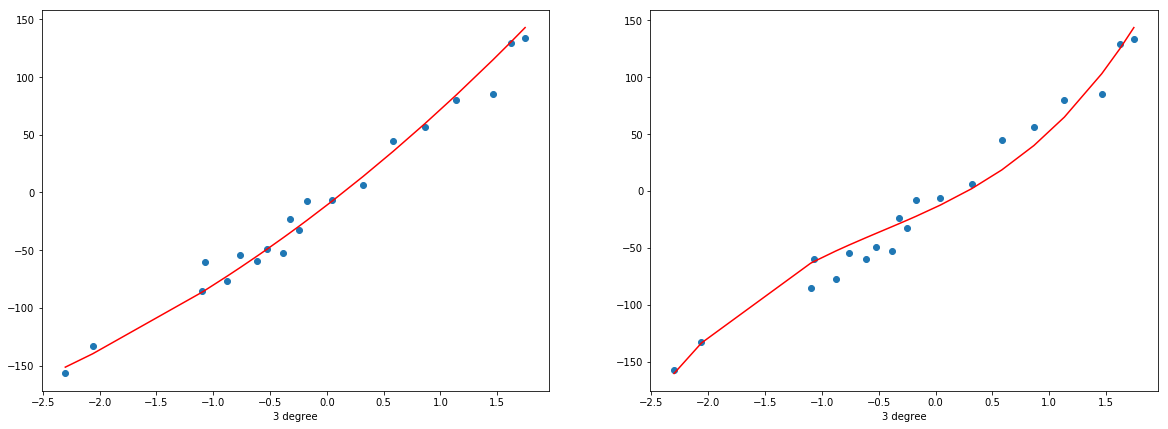

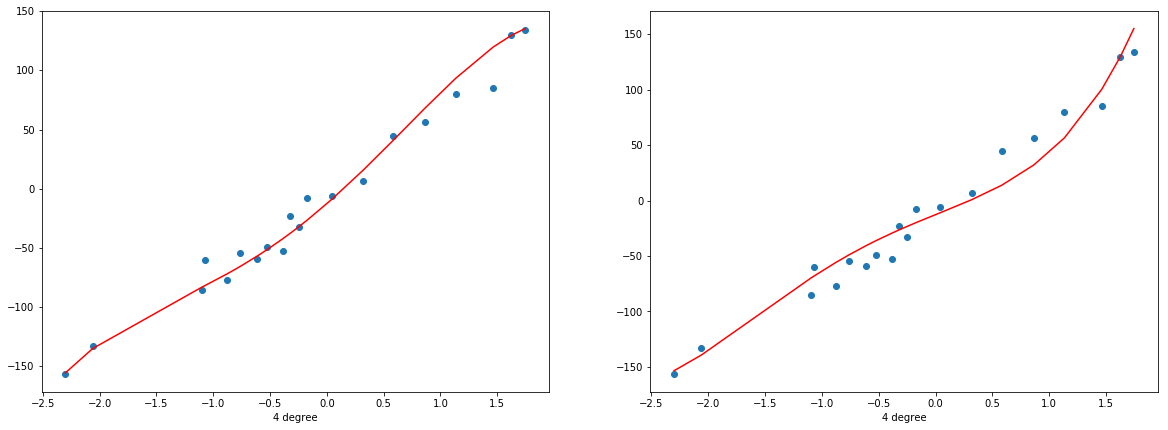

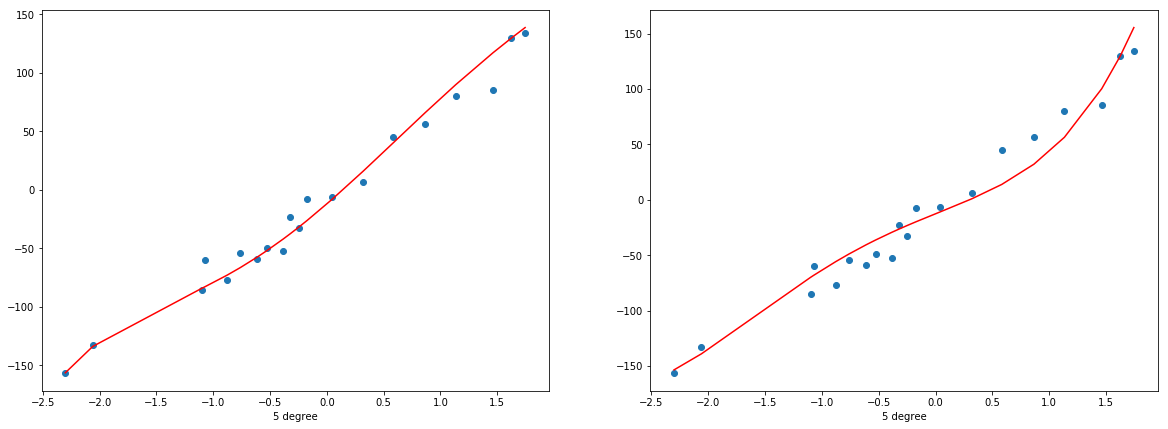

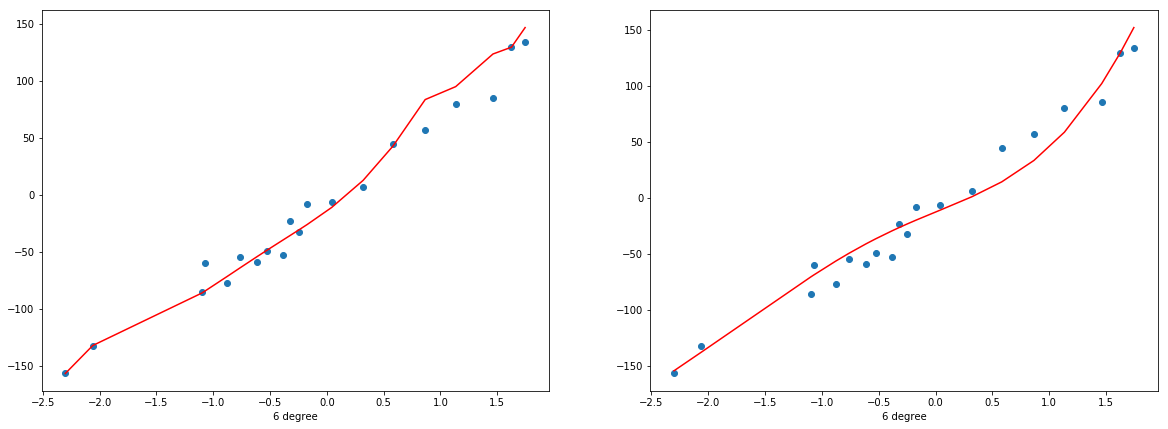

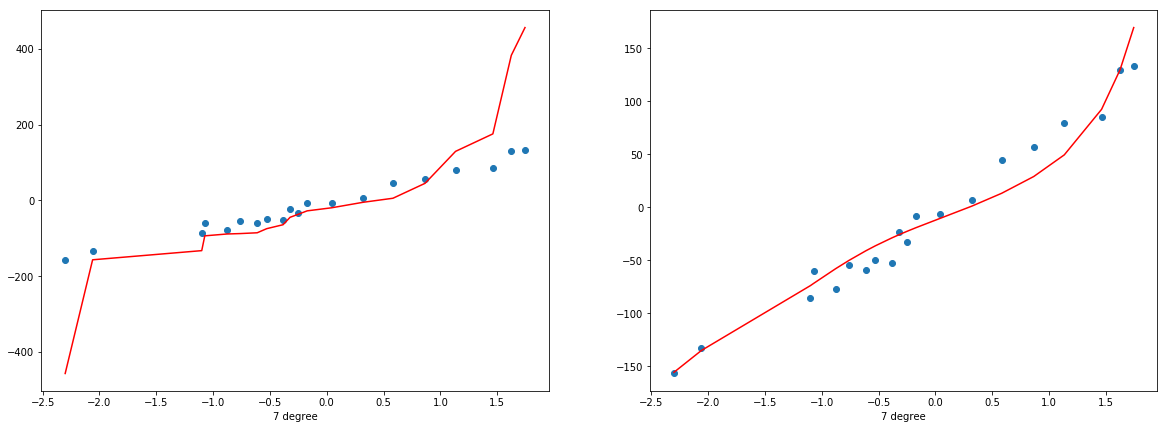

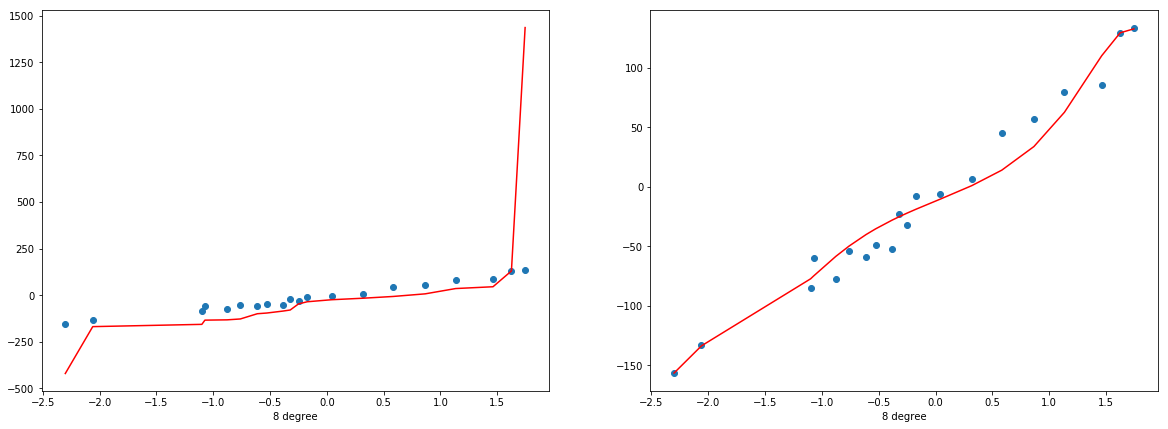

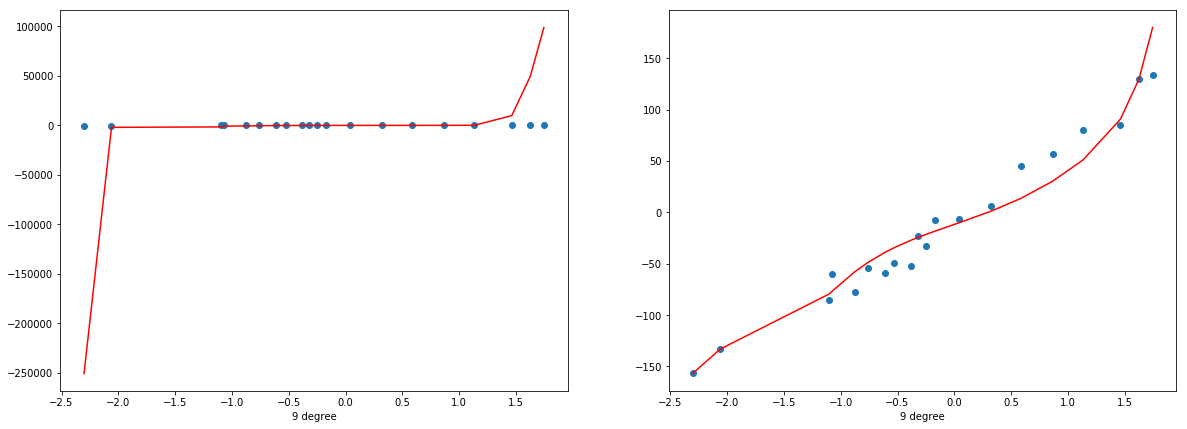

In [2]:
x,y = make_regression(n_samples=20, n_features=1, n_informative=1, noise=15.0, random_state=1, shuffle=False)
x_train, _, y_train, _ = train_test_split(x,y,random_state=1,test_size=0.5)
def plot_model(degree, alpha):
  model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
  model.fit(x_train,y_train)
  plt.scatter(x,y)
  sorted_data = np.sort(np.column_stack((x, model.predict(x))), axis=0)
  plt.plot(sorted_data[:, 0], sorted_data[:, 1], 'r-')
  plt.xlabel(f"{degree} degree")

for i in range(1,10):
  plt.figure(figsize=(20,7))
  plt.subplot(121)
  plot_model(i, 0)
  plt.subplot(122)
  plot_model(i,1.0)
  plt.show()